In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("cleaned_data.csv",index_col=False)

In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df.head()

,name,description,cuisine,course,diet,prep_time,instructions,file_name,ingredients_clean
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,Total in 30 M,"To begin making the Doddapatre Tambuli, first ...",Doddapatre_Tambuli_Recipe_Karuveppilai_Thayir_...,"4 cups Indian borage (Doddapatre) , cleaned an..."
1,Fish Tandoori Recipe,Have you ever tried out fish tandoori? Trust m...,North Indian Recipes,Appetizer,High Protein Non Vegetarian,Total in 80 M,"To begin making the Fish Tandoori recipe, keep...",Fish_Tandoori.jpg,"1 Fish , nicely washed with bones on (I used P..."
2,Arbi Shimla Mirch Sabzi Recipe – Colocasia Cap...,Arbi Shimla Mirch Sabzi Recipe is a variation ...,North Indian Recipes,Main Course,No Onion No Garlic (Sattvic),Total in 55 M,To begin making the Arbi Shimla Mirch Sabzi Re...,Simla_Mirchi_Arbi_Sabzi_Recipe__Capsicum__Colo...,300 grams Colocasia root (Arbi) 1 Green Bell P...
3,Ambur Style Brinjal Curry Recipe,Brinjal Curry is prepared in different ways in...,Indian,Lunch,Vegetarian,Total in 20 M,To begin making the Ambur Style Brinjal Curry ...,Brinjal_curry_for_Biryani.jpg,5 Brinjal (Baingan / Eggplant) 1 Onion 2 Tomat...
4,Mavinakayi Menasinakai Curry Recipe - Raw Man...,Mangalorean Mavinakayi Menasinakai Curry Recip...,Mangalorean,Side Dish,Vegetarian,Total in 35 M,To begin making Mangalorean Mavinakayi Menasin...,Raw_Mango_Coconut_Curry__Mavinakayi_Menasinaka...,"1 cup Mango (Raw) , diced 2 tablespoons Jagger..."


In [5]:
# Dropping rows with NaN values
df.dropna(inplace=True)


In [6]:
df.columns

Index(['name', 'description', 'cuisine', 'course', 'diet', 'prep_time',
       'instructions', 'file_name', 'ingredients_clean'],
      dtype='object')

In [7]:
df['file_name'][0]

'Doddapatre_Tambuli_Recipe_Karuveppilai_Thayir_Pachadi-1.jpg'

In [8]:
df['cuisine'].unique()

array(['Indian', 'North Indian Recipes', 'Mangalorean', 'Kerala Recipes',
       'Konkan', 'South Indian Recipes', 'Tamil Nadu', 'Bengali Recipes',
       'Andhra', 'Coorg', 'Hyderabadi', 'Kashmiri', 'Punjabi',
       'Gujarati Recipes\ufeff', 'Coastal Karnataka', 'Karnataka',
       'Goan Recipes', 'Sichuan', 'Udupi', 'Chettinad',
       'Maharashtrian Recipes', 'Mughlai', 'Malvani',
       'North East India Recipes', 'Rajasthani', 'Parsi Recipes',
       'Bihari', 'Awadhi', 'North Karnataka', 'Assamese', 'Pakistani',
       'Himachal', 'Middle Eastern', 'Oriya Recipes',
       'Uttarakhand-North Kumaon ', 'Lucknowi', 'Sindhi', 'Indo Chinese',
       'Uttar Pradesh', 'Kongunadu', 'Chinese', 'Haryana',
       'South Karnataka', 'Fusion', 'Malabar', 'Nepalese', 'Continental',
       'Jharkhand', 'Sri Lankan', 'Thai', 'Arab', 'Nagaland', 'Afghan',
       'Asian'], dtype=object)

In [9]:
df['course'].unique()

array(['Side Dish', 'Appetizer', 'Main Course', 'Lunch', 'Dinner',
       'Dessert', 'Indian Breakfast', 'North Indian Breakfast',
       'South Indian Breakfast', 'World Breakfast', 'One Pot Dish',
       'Snack', 'Brunch'], dtype=object)

In [10]:
df['diet'].unique()

array(['Vegetarian', 'High Protein Non Vegetarian',
       'No Onion No Garlic (Sattvic)', 'Non Vegeterian', 'Eggetarian',
       'Diabetic Friendly', 'High Protein Vegetarian', 'Gluten Free',
       'Vegan'], dtype=object)

In [15]:
# Selecting only 1000 rows
df=df[:1000]

In [16]:
len(df['course'].unique())

13

In [17]:
df['ingredients_clean'][0]

'4 cups Indian borage (Doddapatre) , cleaned and washed 1/2 cup Curd (Dahi / Yogurt) 1 tablespoon Cumin seeds (Jeera) 1/2 teaspoon Whole Black Peppercorns 1/4 cup Dessicated Coconut Salt , to taste 2 tablespoons Ghee'

In [18]:
df.shape

(1000, 9)

# Libraries

In [19]:
import pandas as pd
import numpy as np
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data_folder = 'data'

# Load your dataset from a CSV file

# Split the data into training (70%), validation (10%), and testing (20%)
train_split = 0.7
val_split = 0.1
test_split = 0.2

train_df = df.sample(frac=train_split, random_state=42)
remaining_df = df.drop(train_df.index)
val_df = remaining_df.sample(frac=val_split / (val_split + test_split), random_state=42)
test_df = remaining_df.drop(val_df.index)

# Determine the number of unique classes in the entire dataset
num_classes = len(df['course'].unique())
print("Number of unique classes:", num_classes)

batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Ensure the data generators use the full class list
class_list = df['course'].unique().tolist()

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)

predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=1,  # Adjust the number of epochs as needed
    validation_data=val_generator,
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

model.save('dish_course_classifier.h5')



Number of unique classes: 13
Found 700 validated image filenames belonging to 13 classes.
Found 100 validated image filenames belonging to 13 classes.
Found 200 validated image filenames belonging to 13 classes.
7/7 [==============================] - 26s 3s/step - loss: 351.7161 - accuracy: 0.1000
Test Accuracy: 0.10000000149011612


C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# report

7/7 [==============================] - 27s 3s/step
Classification Report:
                         precision    recall  f1-score   support

             Side Dish       0.00      0.00      0.00        40
             Appetizer       0.00      0.00      0.00         4
           Main Course       0.00      0.00      0.00         9
                 Lunch       0.00      0.00      0.00        94
                Dinner       0.10      1.00      0.18        20
               Dessert       0.00      0.00      0.00         4
      Indian Breakfast       0.00      0.00      0.00         5
North Indian Breakfast       0.00      0.00      0.00         5
South Indian Breakfast       0.00      0.00      0.00        13
       World Breakfast       0.00      0.00      0.00         0
          One Pot Dish       0.00      0.00      0.00         2
                 Snack       0.00      0.00      0.00         4
                Brunch       0.00      0.00      0.00         0

             micro avg     

C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

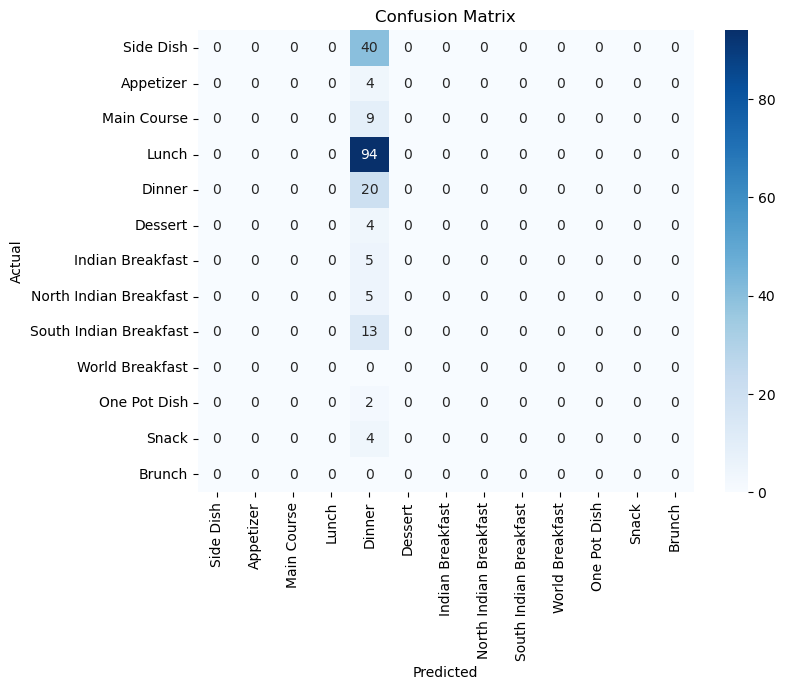

In [20]:
# After model evaluation

# Get the class indices from the test generator
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Map predicted classes to the actual class labels
predicted_labels = [class_labels[i] for i in y_pred_classes]

# Get the true labels
y_true_indices = test_generator.classes
true_labels = [class_labels[i] for i in y_true_indices]

# Generate a classification report
report = classification_report(true_labels, predicted_labels, labels=class_labels)
print("Classification Report:\n", report)

# Generate a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# predicted

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_and_display(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class = class_labels[predicted_class_index]
    predicted_score = np.max(predictions)
    
    print(f'Predicted: {predicted_class}, Score: {predicted_score:.2f}')
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    #plt.title(f'Predicted: {predicted_class}, Score: {predicted_score:.2f}')
    plt.show()



1/1 [==============================] - 1s 1s/step
Predicted: Dinner, Score: 1.00


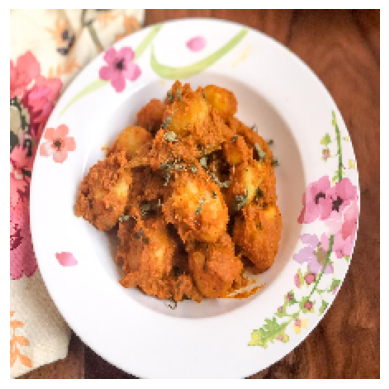

In [22]:
# Example usage
image_path = 'data/Bengali_Aloo_Dum_Recipe-3.jpg'  # Replace with your image path
predict_and_display(image_path)


In [23]:
df.columns

Index(['name', 'description', 'cuisine', 'course', 'diet', 'prep_time',
       'instructions', 'file_name', 'ingredients_clean'],
      dtype='object')

In [24]:
def retrieve_data_from_image(df, image_path):
    # Remove 'data/' from the image path
    modified_image_path = image_path.replace('data/', '')

    # Find the row in the DataFrame
    row = df[df['file_name'] == modified_image_path]

    if row.empty:
        return "No data found for the given image path."
    else:
        # Extracting the relevant data
        data = {
            'Name': row['name'].iloc[0],
            'Description': row['description'].iloc[0],
            'Cuisine': row['cuisine'].iloc[0],
            'Course': row['course'].iloc[0],
            'Diet': row['diet'].iloc[0],
            'Prep Time': row['prep_time'].iloc[0],
            'Instructions': row['instructions'].iloc[0],
            'Ingredients': row['ingredients_clean'].iloc[0]
        }
        return data

# Example usage
image_path = 'data/Bengali_Aloo_Dum_Recipe-3.jpg'
data = retrieve_data_from_image(df, image_path)
print(data)


{'Name': 'बंगाली आलू दम रेसिपी - Bengali Aloo Dum Recipe', 'Description': 'बंगाली आलू दम रेसिपी एक स्वाद से भरपूर रेसिपी है\xa0जिसमे आलू को टमाटर, प्याज और लहसुन के साथ पकाया जाता है. इसमें आलू को करी में 30 मिनट के लिए पकाया जाता है ताकि आलू अच्छी तरह से ग्रेवी सोख ले.\xa0\xa0', 'Cuisine': 'Bengali Recipes', 'Course': 'Main Course', 'Diet': 'Vegetarian', 'Prep Time': 'Total in 70 M', 'Instructions': 'बंगाली आलू दम रेसिपी बनाने के लिए सबसे पहले एक ब्लेंडर में प्याज, अदरक, हरी मिर्च, लहसुन डाले और पेस्ट बना ले. अलग से रख दे.\xa0अब एक कढ़ाई में तेल गरम कर ले. अब इसमें उबले हुए आलू, हल्दी पाउडर, नमक डाले और सुनहरा भूरा होने तक पका ले. अब एक बाउल में डाले और अलग से रख दे.\xa0उसी तेल में थोड़ा और तेल गरम कर ले. इसमें प्याज, अदरक, लहसुन का पेस्ट डाले और पेस्ट को 4\xa0मिनट के लिए पका ले. अब इसमें दालचीनी, लॉन्ग, तेज पत्ता डाले और 2 से 3 मिनट के लिए पका ले.\xa0टमाटर की प्यूरी, हल्दी पाउडर, धनिया पाउडर, गरम मसाला पाउडर डाले और 2 मिनट तक पका ले. अब इसमें दही डाले और मिला ले.1 मिनट के बाद इसमें आलू

In [31]:
pip install langdetect


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 981.5/981.5 KB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b98fe824457f412fef6a04e82c4de3efe831c228cc4d89dd65287d41020a0661
  Stored in directory: c:\users\vijay\appdata\local\pip\cache\wheels\0a\f2\b2\e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip' command.


In [42]:
from langdetect import detect

# Sample DataFrame with 'name' column
import pandas as pd


# Function to detect the language of a name
def detect_language(name):
    try:
        lang = detect(name)
        return lang
    except:
        return 'Unknown'

# Apply the language detection function to the 'name' column
df['language'] = df['name'].apply(detect_language)

# Count the number of English and non-English names
english_count = (df['language'] == 'en').sum()
non_english_count = (df['language'] != 'en').sum()

print(f"Number of English names: {english_count}")
print(f"Number of non-English names: {non_english_count}")


Number of English names: 2428
Number of non-English names: 1974


In [ ]:
# Filter the DataFrame to keep only English names
#df = df[df['language'] == 'en']

# Drop the 'language' column
#df = df.drop(columns=['language'])

In [40]:
pip install translate


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip' command.


In [41]:
import pandas as pd
from translate import Translator



# Function to translate non-English text to English
def translate_to_english(text):
    try:
        # Detect the language of the text
        lang = Translator(to_lang='en').detect(text)
        
        # If the detected language is not English, translate it to English
        if lang != 'en':
            translated_text = Translator(to_lang='en').translate(text)
            return translated_text
        else:
            return text
    except Exception as e:
        return text

# Apply the translation function to multiple columns
columns_to_translate = ['name', 'description', 'instructions','ingredients_clean']

for col in columns_to_translate:
    df[f'translated_{col}'] = df[col].apply(translate_to_english)

# Print the translated DataFrame
print(df)


                                                   name  \
0     Doddapatre Tambuli Recipe (Karpooravalli Thayi...   
1                                  Fish Tandoori Recipe   
2     Arbi Shimla Mirch Sabzi Recipe – Colocasia Cap...   
3                      Ambur Style Brinjal Curry Recipe   
4     Mavinakayi Menasinakai Curry Recipe  - Raw Man...   
...                                                 ...   
4461  Tamil Nadu Style Vazha Thandu Thogayal Recipe ...   
4462  Kondakadalai Vazhathandu Puli Thengai Kuzhambu...   
4463   Besan & Atta Ki Roti Recipe (Chickpea Flatbread)   
4464               Cauliflower And Methi Paratha Recipe   
4465          Dal Chenchki ( Red Lentils with Shallots)   

                                            description               cuisine  \
0     Doddapatre Tambuli Recipe is a popular healing...                Indian   
1     Have you ever tried out fish tandoori? Trust m...  North Indian Recipes   
2     Arbi Shimla Mirch Sabzi Recipe is a variat

# using tensorflow

In [44]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset
from PIL import Image


In [45]:
class FoodDataset(Dataset):
    def __init__(self, dataframe, image_folder, transform=None):
        self.dataframe = dataframe
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.dataframe.iloc[idx, 1]  # Assuming labels are preprocessed

        if self.transform:
            image = self.transform(image)

        return image, label


In [46]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Dataset with image paths and processed labels

train_dataset = FoodDataset(df, '../data', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [47]:
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
num_ingredients = 1000  # Example, change to your number of unique ingredients

model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_ingredients),
    nn.Sigmoid()
)


C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [49]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs=1
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()


FileNotFoundError: [Errno 2] No such file or directory: '../data\\चाउ चाउ सब्ज़ी रेसिपी - Chow Chow Poriyal '

In [54]:
df=df[:800]

In [61]:
df.shape

(800, 15)

# tf

In [55]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import os


# Example preprocessing (adjust according to your data)
mlb = MultiLabelBinarizer()
df['processed_labels'] = df['ingredients_clean'].apply(lambda x: x.split(', '))  # Adjust this split method as needed
mlb.fit(df['processed_labels'])
df['processed_labels'] = list(mlb.transform(df['processed_labels']))

# Now, df['processed_labels'] contains binary vectors


C:\Users\vijay\AppData\Local\Temp\ipykernel_2524\469799842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_labels'] = df['ingredients_clean'].apply(lambda x: x.split(', '))  # Adjust this split method as needed
C:\Users\vijay\AppData\Local\Temp\ipykernel_2524\469799842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_labels'] = list(mlb.transform(df['processed_labels']))


In [56]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

class FoodDataset(Dataset):
    def __init__(self, dataframe, image_folder, transform=None):
        self.dataframe = dataframe
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.dataframe.iloc[idx]['file_name'])
        image = Image.open(img_name).convert('RGB')
        label = torch.tensor(self.dataframe.iloc[idx]['processed_labels'])

        if self.transform:
            image = self.transform(image)

        return image, label


In [57]:
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Initialize dataset and dataloader
image_folder = 'data'  # Adjust the folder path if necessary
train_dataset = FoodDataset(df, image_folder, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the model
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
num_ingredients = len(mlb.classes_)  # Number of unique ingredients

model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_ingredients),
    nn.Sigmoid()
)

# Training
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 1

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()


In [59]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# Function to preprocess the image
def preprocess_image(img_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(img_path).convert('RGB')
    return transform(image).unsqueeze(0)  # Add batch dimension

# Function to predict ingredients
def predict_ingredients(model, img_path, mlb):
    # Preprocess the image
    processed_img = preprocess_image(img_path)

    # Predict using the model
    model.eval()
    with torch.no_grad():
        outputs = model(processed_img)

    # Convert output probabilities to labels
    predicted_labels = torch.sigmoid(outputs).ge(0.5).int()
    ingredients = mlb.inverse_transform(predicted_labels)
    return ingredients[0]  # Get the ingredient list from the first (and only) batch item



In [60]:
# Example usage
img_path = 'data/Fish_Tandoori.jpg' # Replace with your image path
predicted_ingredients = predict_ingredients(model, img_path, mlb)
print("Predicted Ingredients:", predicted_ingredients)


Predicted Ingredients: ('& whole grapes] 1 1/2 cup Curd (Dahi / Yogurt) ', '(1/2 inch size) 3/4 teaspoon Salt 1/4 cup Water 2 tablespoons Coconut Oil', '(Adjust to suit your spice levels) 1/4 teaspoon Turmeric powder (Haldi) Salt ', '(Manoli) 1/2 cup Cashew nuts ', '(Red/ Green Cabbage) roughly chopped 1 cup Yellow Moong Dal (Split) 1/2 teaspoon Turmeric powder (Haldi) Salt ', '(a generous pinch) 1 sprig Curry leaves', '(a special rice available in the indian stores for making idli and dosas) 1/2 cup Ragi Seeds 1 cup White Urad Dal (Whole) 1 teaspoon Methi Seeds (Fenugreek Seeds) Water ', '(adjust to suit your taste) Salt ', '(adjust to taste) 1 teaspoon Ghee ', '(adjust) 1 tablespoon Mustard oil Lukewarm Water ', '(adjust) 1 tablespoon Whole Black Peppercorns ', '(adjust) 1 teaspoon Cumin seeds (Jeera) 1/2 teaspoon Whole Black Peppercorns For Tempering 1 teaspoons Coconut Oil 1 teaspoon Mustard seeds (Rai/ Kadugu) 1 sprig Curry leaves', '(adjust) 1 to 2 teaspoon Red Chilli powder ', '

In [76]:
pip install efficientnet_pytorch


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=1ff11d7c2ae08fcc04caf0cb15233a152efa5c4e3c11505d57ff3187a5a8ae11
  Stored in directory: c:\users\vijay\appdata\local\pip\cache\wheels\8b\6f\9b\231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
Successfully built efficientnet_pytorch
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip' command.


# testing

In [77]:
from efficientnet_pytorch import EfficientNet

In [78]:
import pandas as pd
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.preprocessing import MultiLabelBinarizer
import os

# Data preprocessing
#df = pd.read_csv('your_dataset.csv')  # Replace with your dataset path
mlb = MultiLabelBinarizer()
df['ingredients_clean'] = df['ingredients_clean'].astype(str)  # Ensure ingredients are strings
df['processed_labels'] = df['ingredients_clean'].apply(lambda x: x.split(', '))
mlb.fit(df['processed_labels'])
transformed_labels = mlb.transform(df['processed_labels'])
df['processed_labels'] = [list(row) for row in transformed_labels]

# Dataset class
class FoodDataset(Dataset):
    def __init__(self, dataframe, image_folder, transform=None):
        self.dataframe = dataframe
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.dataframe.iloc[idx]['file_name'])
        image = Image.open(img_name).convert('RGB')
        label = torch.tensor(self.dataframe.iloc[idx]['processed_labels'])

        if self.transform:
            image = self.transform(image)

        return image, label

# Transformations and Dataloader
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image_folder = 'data'
train_dataset = FoodDataset(df, image_folder, transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Model Definition with EfficientNet
model_name = 'efficientnet-b0'
model = EfficientNet.from_pretrained(model_name)
num_features = model._fc.in_features
model._fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, len(mlb.classes_)),
    nn.Sigmoid()
)

# Training the Model
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 1  # Adjust as needed

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to C:\Users\vijay/.cache\torch\hub\checkpoints\efficientnet-b0-355c32eb.pth
100%|█████████████████████████████████████████████████████████████████████████████| 20.4M/20.4M [00:01<00:00, 11.3MB/s]


Loaded pretrained weights for efficientnet-b0


In [90]:

# Prediction Function
def preprocess_image(img_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(img_path).convert('RGB')
    return transform(image).unsqueeze(0)

def predict_ingredients(model, img_path, mlb):
    processed_img = preprocess_image(img_path)
    model.eval()
    with torch.no_grad():
        outputs = model(processed_img)
    predicted_labels = torch.sigmoid(outputs).ge(0.5).int()  # Adjust threshold if necessary
    ingredients = mlb.inverse_transform(predicted_labels)
    return ingredients[0]



In [89]:
# Example Prediction
img_path = 'data/Fish_Tandoori.jpg' # Replace with your image path
predicted_ingredients = predict_ingredients(model, img_path, mlb)
print(predicted_ingredients)


()


In [81]:
len(predicted_ingredients)

4031

In [82]:
len(mlb.classes_)

4031

In [87]:
def predict_ingredients(model, img_path, mlb, threshold=0.5):  # Add a threshold parameter
    processed_img = preprocess_image(img_path)
    model.eval()
    with torch.no_grad():
        outputs = model(processed_img)
    predicted_labels = torch.sigmoid(outputs).ge(threshold).int()  # Use the new threshold
    ingredients = mlb.inverse_transform(predicted_labels)
    return ingredients[0]

# Test with a different threshold
predicted_ingredients = predict_ingredients(model, img_path, mlb, threshold=0.6)  # Example threshold
print(predicted_ingredients)


()


In [63]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming df is your dataframe and it is properly loaded
mlb = MultiLabelBinarizer()
df['ingredients_clean'] = df['ingredients_clean'].astype(str)  # Ensure string type
df['processed_labels'] = df['ingredients_clean'].apply(lambda x: x.split(', '))

# Fit and transform the labels
mlb.fit(df['processed_labels'])
transformed_labels = mlb.transform(df['processed_labels'])

# Check if the transformation is correct
print("Original DataFrame length:", len(df))
print("Transformed labels shape:", transformed_labels.shape)

# Only assign if lengths match
if len(df) == transformed_labels.shape[0]:
    df['processed_labels'] = list(transformed_labels)
else:
    print("Mismatch in DataFrame length and transformed labels shape. Cannot assign.")


Original DataFrame length: 800
Transformed labels shape: (800, 4031)


# testing 2

In [109]:
from tqdm import tqdm  # Optional, for a nice progress bar


In [110]:
import pandas as pd
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from sklearn.preprocessing import MultiLabelBinarizer
import os

# Assuming the DataFrame 'df' is loaded correctly
mlb = MultiLabelBinarizer()
df['ingredients_clean'] = df['ingredients_clean'].astype(str)
df['processed_labels'] = df['ingredients_clean'].apply(lambda x: x.split(', '))
mlb.fit(df['processed_labels'])
transformed_labels = mlb.transform(df['processed_labels'])
df['processed_labels'] = [list(row) for row in transformed_labels]

class FoodDataset(Dataset):
    def __init__(self, dataframe, image_folder, transform=None):
        self.dataframe = dataframe
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.dataframe.iloc[idx]['file_name'])
        image = Image.open(img_name).convert('RGB')
        label = torch.tensor(self.dataframe.iloc[idx]['processed_labels'])
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image_folder = 'data'  # Update with your image folder path
train_dataset = FoodDataset(df, image_folder, transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [111]:
import torchvision.models as models
import torch.nn as nn
from efficientnet_pytorch import EfficientNet

# ResNet50 Model
resnet_model = models.resnet50(pretrained=True)
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, len(mlb.classes_)),
    nn.Sigmoid()
)

# EfficientNet Model
efficientnet_model = EfficientNet.from_pretrained('efficientnet-b0')
num_ftrs = efficientnet_model._fc.in_features
efficientnet_model._fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, len(mlb.classes_)),
    nn.Sigmoid()
)


Loaded pretrained weights for efficientnet-b0


In [112]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=0.001)



# Check gradients function
def print_gradients(model):
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name, param.grad)

# Training Loop with Additional Diagnostics
num_epochs = 1
for epoch in range(num_epochs):
    resnet_model.train()
    running_loss = 0.0
    total_images = 0

    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = resnet_model(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_images += inputs.size(0)

        if (i + 1) % 100 == 0 or i == len(train_loader) - 1:
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{len(train_loader)}, Loss: {running_loss / total_images:.4f}")

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1} completed, Avg Loss: {epoch_loss:.4f}")

    # Print gradients
    print_gradients(resnet_model)

Epoch 1/1, Batch 25/25, Loss: 0.0220
Epoch 1 completed, Avg Loss: 0.0220
conv1.weight tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.

layer4.0.conv2.weight tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
        

In [114]:
def preprocess_image(img_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(img_path).convert('RGB')
    return transform(image).unsqueeze(0)

def predict_ingredients(model, img_path, mlb, threshold=0.5):
    processed_img = preprocess_image(img_path)
    model.eval()
    with torch.no_grad():
        outputs = model(processed_img)
    predicted_labels = torch.sigmoid(outputs).ge(threshold).int()
    ingredients = mlb.inverse_transform(predicted_labels)
    return ingredients[0]

# Example Prediction
img_path = 'data/Fish_Tandoori.jpg'  # Replace with your image path
predicted_ingredients = predict_ingredients(resnet_model, img_path, mlb, threshold=0.5)
print(predicted_ingredients)


('& whole grapes] 1 1/2 cup Curd (Dahi / Yogurt) ', '(1/2 inch size) 3/4 teaspoon Salt 1/4 cup Water 2 tablespoons Coconut Oil', '(Adjust to suit your spice levels) 1/4 teaspoon Turmeric powder (Haldi) Salt ', '(Manoli) 1/2 cup Cashew nuts ', '(Red/ Green Cabbage) roughly chopped 1 cup Yellow Moong Dal (Split) 1/2 teaspoon Turmeric powder (Haldi) Salt ', '(a generous pinch) 1 sprig Curry leaves', '(a special rice available in the indian stores for making idli and dosas) 1/2 cup Ragi Seeds 1 cup White Urad Dal (Whole) 1 teaspoon Methi Seeds (Fenugreek Seeds) Water ', '(adjust to suit your taste) Salt ', '(adjust to taste) 1 teaspoon Ghee ', '(adjust) 1 tablespoon Mustard oil Lukewarm Water ', '(adjust) 1 tablespoon Whole Black Peppercorns ', '(adjust) 1 teaspoon Cumin seeds (Jeera) 1/2 teaspoon Whole Black Peppercorns For Tempering 1 teaspoons Coconut Oil 1 teaspoon Mustard seeds (Rai/ Kadugu) 1 sprig Curry leaves', '(adjust) 1 to 2 teaspoon Red Chilli powder ', '(adjust) 1-1/2 cup Wate

In [ ]:
def predict_ingredients(model, img_path, mlb, threshold=0.5):
    processed_img = preprocess_image(img_path)
    model.eval()
    with torch.no_grad():
        outputs = model(processed_img)
    predicted_probs = torch.sigmoid(outputs)
    predicted_labels = predicted_probs.ge(threshold).int()
    ingredients = mlb.inverse_transform(predicted_labels)
    return ingredients[0], predicted_probs

# Test with a lower threshold
predicted_ingredients, predicted_probs = predict_ingredients(resnet_model, img_path, mlb, threshold=0.5)
print("Predicted Ingredients:", predicted_ingredients)
print("Predicted Probabilities:", predicted_probs)


In [105]:

# this is for test

def predict_ingredients(model, img_path, mlb, threshold=0.5):
    processed_img = preprocess_image(img_path)
    model.eval()
    with torch.no_grad():
        outputs = model(processed_img)
    predicted_probs = torch.sigmoid(outputs)
    predicted_labels = predicted_probs.ge(threshold).int()
    ingredients = mlb.inverse_transform(predicted_labels)
    return ingredients[0], predicted_probs.squeeze().tolist()

# Example usage
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
for thresh in thresholds:
    predicted_ingredients, probs = predict_ingredients(resnet_model, img_path, mlb, threshold=thresh)
    print(f"Threshold: {thresh}, Number of Predicted Ingredients: {len(predicted_ingredients)}")


Threshold: 0.5, Number of Predicted Ingredients: 4031
Threshold: 0.6, Number of Predicted Ingredients: 0
Threshold: 0.7, Number of Predicted Ingredients: 0
Threshold: 0.8, Number of Predicted Ingredients: 0
Threshold: 0.9, Number of Predicted Ingredients: 0


In [106]:
def preprocess_image(img_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(img_path).convert('RGB')
    return transform(image).unsqueeze(0)

def predict_ingredients(model, img_path, mlb, threshold=0.5):
    processed_img = preprocess_image(img_path)
    model.eval()
    with torch.no_grad():
        outputs = model(processed_img)
    predicted_probs = torch.sigmoid(outputs)
    predicted_labels = predicted_probs.ge(threshold).int()
    ingredients = mlb.inverse_transform(predicted_labels)
    return ingredients[0], predicted_probs.squeeze().tolist()

# Example usage with more detailed output
img_path = 'data/Fish_Tandoori.jpg'  # Replace with your image path
thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for thresh in thresholds:
    predicted_ingredients, probs = predict_ingredients(resnet_model, img_path, mlb, threshold=thresh)
    print(f"Threshold: {thresh}, Number of Predicted Ingredients: {len(predicted_ingredients)}")
    print(f"Raw probabilities: {probs[:10]}")  # Print first 10 probabilities for inspection

Threshold: 0.5, Number of Predicted Ingredients: 4031
Raw probabilities: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Threshold: 0.55, Number of Predicted Ingredients: 0
Raw probabilities: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Threshold: 0.6, Number of Predicted Ingredients: 0
Raw probabilities: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Threshold: 0.65, Number of Predicted Ingredients: 0
Raw probabilities: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Threshold: 0.7, Number of Predicted Ingredients: 0
Raw probabilities: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Threshold: 0.75, Number of Predicted Ingredients: 0
Raw probabilities: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Threshold: 0.8, Number of Predicted Ingredients: 0
Raw probabilities: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Threshold: 0.85, Number of Predicted Ingredients: 0
Raw probabilities: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Threshold: 0.9, Number of